# **8️⃣ Support Vector Machines (SVMs): What They Are & How They Find the Optimal Hyperplane 🚀📊⚽🏀**

## **💡 Real-Life Analogy: Drawing the Best Defensive Line in Football ⚽️**
Imagine you're a football coach tasked with drawing a **defensive line** that best separates your team from the opponents on the field.
- You want to **maximize the gap** (or margin) between your defenders and the attackers so that any crossing of that line is clear and controlled.
- Only the **players closest to this line** (your best defenders) determine how strong your defense is.
- In SVMs, these closest points are called **"support vectors"** and the line you draw is the **optimal hyperplane**. 🛡️🎯

Similarly, in **NBA** analytics, imagine you need to separate **All-Star players** from non-All-Stars based on performance metrics (like points, assists, rebounds). You want the decision boundary that best separates these two groups while maximizing the “buffer” zone between them.

And in **Texas Hold’em Poker** analytics, an SVM might help classify whether a hand is strong or weak by finding the optimal boundary in the feature space of hand statistics.

## **📌 What is an SVM?**
✅ **Support Vector Machines (SVMs)** are supervised learning algorithms used for **classification** (and regression). They work by finding the **optimal hyperplane** that **maximally separates** data points of different classes.

### **Mathematical Foundations**
- **Hyperplane Equation**:  
  $$
  w \cdot x + b = 0
  $$
  where:  
  - $ w $ is the weight vector  
  - $ b $ is the bias  
  - $ x $ is the input feature vector

- **Separation Condition**: For binary classification with labels $ y_i \in \{-1, +1\} $:
  $$
  y_i (w \cdot x_i + b) \geq 1 \quad \forall i
  $$

- **Margin**: The distance between the hyperplane and the nearest data points (support vectors) is:
  $$
  \text{Margin} = \frac{2}{\|w\|}
  $$
  SVMs **maximize this margin** to achieve robust separation. 💪✨

- **Kernel Trick**:  
  For data that is not linearly separable in the original space, SVMs can use **kernel functions** (like RBF, polynomial) to project data into a higher-dimensional space where a linear hyperplane can separate classes. 🔮📐

## **📊 How SVMs Find the Optimal Hyperplane**
1️⃣ **Identify Support Vectors**:  
   - The algorithm finds the data points that are **closest to the hyperplane**. These points are critical since they **define the margin**.
2️⃣ **Maximize the Margin**:  
   - By solving a constrained optimization problem (using Lagrange multipliers), SVMs adjust $ w $ and $ b $ to **maximize the distance** between the hyperplane and the support vectors.
3️⃣ **Kernel Application (if needed)**:  
   - For non-linearly separable data, a **kernel function** transforms the data into a higher-dimensional space to enable linear separation.

In [1]:
from mermaid_renderer import render_mermaid, render_mermaid_from_file

## **🌟 Mermaid Diagram: SVM for Sports Analytics**



Below is a **Mermaid diagram** showing how SVMs work for a **Football example** (separating teams that win vs. lose):


In [2]:
render_mermaid_from_file("08/01_svm_football.mmd")

- **Blue Points**: Teams that win.
- **Red Points**: Teams that lose.
- **Support Vectors (S1, S2)**: Critical points that define the margin.
- **Hyperplane (H)**: The line that best separates the two classes, maximizing the **margin (M)**.
- **Margin**: The distance (buffer) ensuring robust separation. 🚀💥

## **🛠️ Python Code Example: SVM for Synthetic Football Data**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
# Set seed for reproducibility
np.random.seed(42)

In [5]:
# Generate synthetic football data:
# Features: [Shots on Target (0-10), Possession % (30-100), Opponent Strength (0-10)]
n_samples = 300
shots = np.random.randint(0, 11, n_samples)
possession = np.random.randint(30, 101, n_samples)
opp_strength = np.random.randint(0, 11, n_samples)


In [6]:
X = np.vstack([shots, possession, opp_strength]).T.astype(float)
# Create synthetic target: If (Shots * 0.4 + Possession * 0.01 - OppStrength * 0.3) > 2 then Win (1) else Loss (0)
y = (shots * 0.4 + possession * 0.01 - opp_strength * 0.3 > 2).astype(int)

In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Create and train the SVM classifier with a linear kernel
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"⚽ Football SVM Model Accuracy: {accuracy*100:.2f}%")

⚽ Football SVM Model Accuracy: 97.78%


In [9]:
# Visualizing Decision Boundaries (using first two features for simplicity)
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Only use first 2 features for 2D plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    X_plot = np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)]  # Set 3rd feature to 0
    X_plot = scaler.transform(X_plot)  # Standardize using same scaler (not perfect, for illustration)
    Z = model.predict(X_plot)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Shots on Target (scaled)")
    plt.ylabel("Possession % (scaled)")
    plt.title(title)
    plt.show()

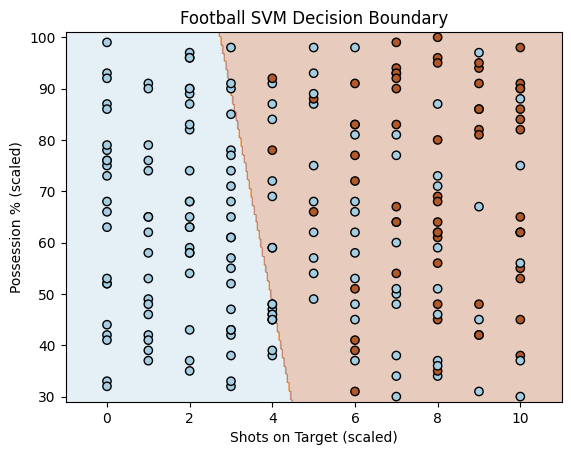

In [10]:
# Plot decision boundary for Football data (using first two features)
plot_decision_boundary(svm_model, X_train, y_train, title="Football SVM Decision Boundary")

### **Explanation of the Football SVM Decision Boundary Graph**



#### **1. Overview**


This graph visualizes a **Support Vector Machine (SVM) classifier** applied to a football dataset with two key features:
   - **X-axis:** **Shots on Target (scaled)** – The number of shots on target, normalized or scaled.
   - **Y-axis:** **Possession % (scaled)** – The percentage of ball possession by a team, also scaled.

The SVM model has been trained to classify data points into two distinct categories, represented by the two background colors:
   - **Light Blue Region:** One class (e.g., "Team A Wins" or "Draw").
   - **Light Brown Region:** The other class (e.g., "Team B Wins").



#### **2. Key Features of the Decision Boundary**


- The **diagonal boundary** separates the two classes, meaning the SVM has found a **linear decision boundary** that best divides the data.
- The curve of the boundary suggests that as a team takes more **shots on target**, they are more likely to be classified in the brown region.
- Teams with **fewer shots on target but high possession** tend to fall in the **blue region**, implying that **possession alone is not always a decisive factor**.



#### **3. Interpretation of Data Points**


- **Blue Circles:** Data points classified into the blue region.
- **Brown Circles:** Data points classified into the brown region.
- **Misclassified Points:** Some points near the boundary might be on the "wrong" side, indicating **misclassifications** or cases where the model struggles to separate the two groups cleanly.



#### **4. Insights and Implications**


- **Shots on Target is a Stronger Indicator**: The decision boundary tilts diagonally, meaning teams with more **shots on target** are more likely to belong to the brown region.
- **Possession Alone is Not Enough**: Even teams with high possession percentages (upper left of the graph) can still be in the **blue region**, suggesting possession does not necessarily lead to victory unless converted into shots on target.
- **Possible Tactical Differences**: Teams in the blue region may focus more on possession-based playstyles, while teams in the brown region may rely on **direct attacking strategies** with more shots.



#### **5. Next Steps for Analysis**


- Incorporate additional features like **goals scored, passing accuracy, or defensive stats** to improve classification accuracy.
- Test different SVM kernels (e.g., **non-linear kernels like RBF**) if the decision boundary is too rigid.



### **Conclusion**


This graph demonstrates how an SVM model classifies football match outcomes (or another target variable) based on **Shots on Target** and **Possession Percentage**. The classification boundary suggests that shots on target have a stronger influence on outcomes than possession alone. However, some points near the boundary indicate that additional variables may be needed to improve classification accuracy.

## **🛠️ Python Code Example: SVM for Synthetic NBA Data**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Set seed for reproducibility
np.random.seed(42)

In [13]:
# Generate synthetic NBA data:
# Features: [Points Per Game (80-120), Combined Assists+Rebounds (10-50), Team Efficiency (30-80)]
n_samples_nba = 300
ppg = np.random.randint(80, 121, n_samples_nba)
asst_reb = np.random.randint(10, 51, n_samples_nba)
efficiency = np.random.randint(30, 81, n_samples_nba)

In [14]:
X_nba = np.vstack([ppg, asst_reb, efficiency]).T.astype(float)
# Synthetic target: if (PPG * 0.05 + (Assists+Rebounds) * 0.1 + Efficiency * 0.02) > 10 then Win (1) else Loss (0)
y_nba = ((ppg * 0.05 + asst_reb * 0.1 + efficiency * 0.02) > 10).astype(int)

In [15]:
# Split into training and testing sets
X_train_nba, X_test_nba, y_train_nba, y_test_nba = train_test_split(X_nba, y_nba, test_size=0.3, random_state=42)

# Standardize the NBA features
scaler_nba = StandardScaler()
X_train_nba_scaled = scaler_nba.fit_transform(X_train_nba)
X_test_nba_scaled = scaler_nba.transform(X_test_nba)

In [16]:
# Create and train the SVM classifier (using a linear kernel)
svm_nba = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_nba.fit(X_train_nba_scaled, y_train_nba)

# Evaluate the model
nba_accuracy = svm_nba.score(X_test_nba_scaled, y_test_nba)
print(f"🏀 NBA SVM Model Accuracy: {nba_accuracy*100:.2f}%")

🏀 NBA SVM Model Accuracy: 96.67%


In [17]:
# Visualize Decision Boundary (using first two features for illustration)
def plot_decision_boundary_nba(model, X, y, title="Decision Boundary"):
    # Use first 2 features for 2D visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    X_plot = np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)]
    X_plot = scaler_nba.transform(X_plot)
    Z = model.predict(X_plot)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Points Per Game (scaled)")
    plt.ylabel("Assists+Rebounds (scaled)")
    plt.title(title)
    plt.show()

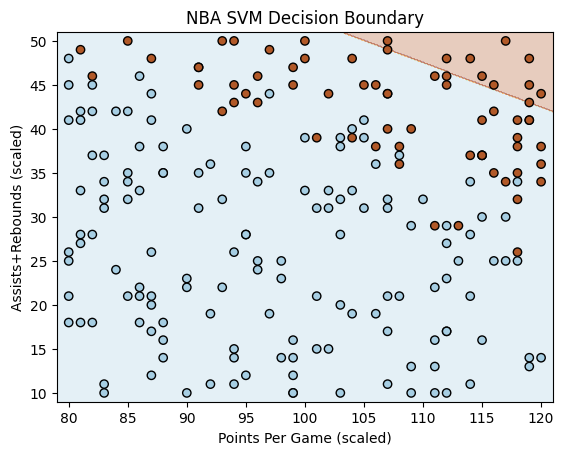

In [18]:
# Plot decision boundary for NBA data (using first two features)
plot_decision_boundary_nba(svm_nba, X_train_nba, y_train_nba, title="NBA SVM Decision Boundary")

### **Explanation of the NBA SVM Decision Boundary Graph**



#### **1. Overview**


This graph visualizes a **Support Vector Machine (SVM) classification** applied to an NBA dataset, with two key features:
   - **X-axis:** **Points Per Game (scaled)** – The average points a team scores per game, scaled for normalization.
   - **Y-axis:** **Assists + Rebounds (scaled)** – A combined metric of assists and rebounds, also scaled.

The SVM model has been trained to classify data points into two distinct categories, represented by different background colors:
   - **Light Blue Region:** One class (e.g., "Non-Elite Teams" or "Low-Win Teams").
   - **Light Brown Region:** The other class (e.g., "Elite Teams" or "High-Win Teams").



#### **2. Understanding the Decision Boundary**


- The **diagonal decision boundary** separates the two classes, meaning the SVM model finds the best linear separator between them.
- The brown region (top right) represents teams with **high points per game and high assists + rebounds**, likely corresponding to **elite teams**.
- The blue region (majority of the graph) contains teams with **lower points per game and fewer assists + rebounds**, likely representing **non-elite teams** or those with fewer wins.



#### **3. Interpretation of Data Points**


- **Blue Circles:** Data points classified into the blue region (likely lower-performing teams).
- **Brown Circles:** Data points classified into the brown region (likely elite teams with strong offensive and rebounding performances).
- **Misclassified Points:** Some points close to the boundary may be on the "wrong" side, indicating cases where the model struggles to separate teams cleanly.



#### **4. Key Insights**


- **Scoring and Playmaking Matter**:
  - Teams in the brown region (higher **PPG + assists/rebounds**) are more likely to be classified as elite or successful.
  - This suggests that **high-scoring teams that also dominate in playmaking and rebounding tend to perform better**.

- **Majority of Teams are Below the Threshold**:
  - Most data points fall within the **blue region**, meaning the majority of NBA teams do not meet the threshold for elite classification in this model.
  - Only a small subset in the **upper-right corner** belongs to the elite class.

- **Impact of Rebounds & Assists**:
  - Some teams with **high assists + rebounds but lower points per game** still fall in the blue region. This implies that while rebounding and assists help, they may not be sufficient alone to classify a team as elite—**scoring is crucial**.


#### **5. Next Steps for Further Analysis**


- **Feature Expansion**:
  - Include additional features like **defensive efficiency, shooting percentages, or turnovers** to improve classification accuracy.
  - Investigate whether a **non-linear SVM kernel (e.g., RBF)** could better capture complex relationships.

- **Model Improvement**:
  - Analyze **misclassified teams** near the decision boundary to determine why they don't fit neatly into either class.
  - Consider weighting features differently (e.g., giving more importance to points per game).

- **Tactical Implications**:
  - Teams in the **blue region but close to the boundary** might be near-contenders who need **marginal improvements in scoring or rebounding** to break into elite status.


### **Conclusion**


This SVM decision boundary graph demonstrates how NBA teams can be classified based on **points per game and assists + rebounds**. The model suggests that **high-scoring teams with strong playmaking and rebounding tend to be elite**, while teams with lower values in these metrics are classified as non-elite. The decision boundary provides insight into **which teams might need improvements in key areas to reach higher performance levels**.

## **🚀 Final Takeaways**
1. **SVMs** are powerful classifiers that find the **optimal hyperplane** to separate classes by maximizing the margin.
2. The optimal hyperplane is determined by **support vectors**, the data points closest to the boundary.
3. **Mathematically**, SVMs solve an optimization problem that maximizes the margin subject to constraints $ y_i (w \cdot x_i + b) \geq 1 $.
4. **Real-life sports examples**:
   - In **football**, SVMs can separate winning vs. losing teams based on match stats.
   - In the **NBA**, SVMs help distinguish between winning and losing games using player performance metrics.
   - In **poker**, SVMs could classify strong vs. weak hands based on statistical features.
5. **Python code examples** demonstrate training SVMs using synthetic sports data, visualizing decision boundaries, and evaluating model accuracy with plenty of emojis to make it fun and engaging! 🎉🏆🔥